In [1]:
import pandas as pd
import sys, os
train = pd.read_csv('D:/혁신성장/train/public/final_landmark(1).csv', encoding='cp949')
category = pd.read_csv('D:/혁신성장/train/public/category.csv')

train['filepath'] = [('D:/혁신성장/train/public/서울시/' + category[category["landmark_id"] == lm_id].iloc[0,1] + '/' + str(id)+'.JPG') for lm_id, id in zip(train['landmark_id'], train['id'])]


In [2]:
train = train.drop(["id","landmark_id"], axis = 1)

In [3]:
import unicodedata
#train['filepath'] = train['filepath'].apply(lambda x: unicodedata.normalize('NFD',x))

train["filepath"][1]

'D:/혁신성장/train/public/서울시/북악팔각정/북악팔각정_033.JPG'

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     6703 non-null   int64 
 1   filepath  6703 non-null   object
dtypes: int64(1), object(1)
memory usage: 104.9+ KB


In [5]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.
import numpy as np
index = np.arange(3)

['NanumGothic']


In [6]:
train['label'].value_counts()

0    2723
2    2100
1    1880
Name: label, dtype: int64

Text(0, 0.5, '샘플 수')

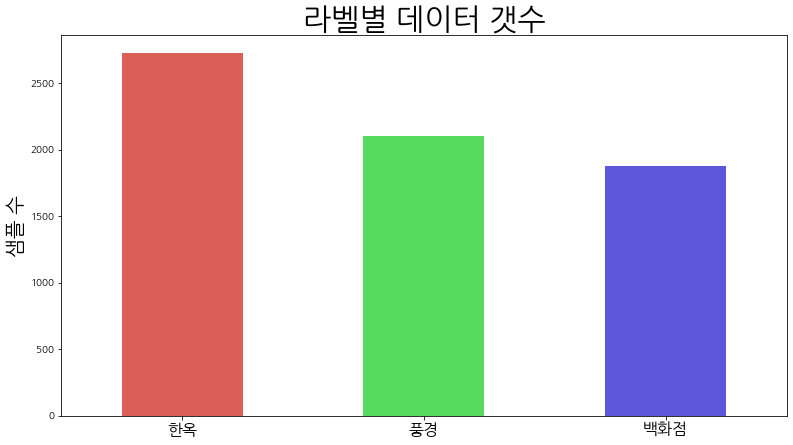

In [7]:
colors = sns.color_palette('hls',3)
plt.figure(figsize=(13,7))
train['label'].value_counts().plot.bar(color= colors)
plt.title("라벨별 데이터 갯수", fontsize = 30)
plt.xticks(index, ['한옥','풍경','백화점'], fontsize = 16, rotation=0)
plt.ylabel("샘플 수",fontsize = 20)

### train, test 데이터 분리

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(train,train["label"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]
print(strat_test_set["label"].value_counts()/len(strat_test_set))
print(train["label"].value_counts()/len(train))

0    0.406266
2    0.313277
1    0.280457
Name: label, dtype: float64
0    0.406236
2    0.313293
1    0.280471
Name: label, dtype: float64


In [9]:
strat_train_set

,label,filepath
5763,2,D:/혁신성장/train/public/서울시/롯데백화점[잠실]/롯데백화점[잠실]_1...
4761,2,D:/혁신성장/train/public/서울시/롯데백화점[영등포]/롯데백화점[영등포]...
1989,0,D:/혁신성장/train/public/서울시/광희문/광희문_051.JPG
1867,0,D:/혁신성장/train/public/서울시/문묘/문묘_024.JPG
1971,0,D:/혁신성장/train/public/서울시/광희문/광희문_035.JPG
...,...,...
4442,1,D:/혁신성장/train/public/서울시/몽촌토성/몽촌토성_098.JPG
2891,1,D:/혁신성장/train/public/서울시/한남대교/한남대교_014.JPG
1344,0,D:/혁신성장/train/public/서울시/서울금성당/서울금성당_110.JPG
422,0,D:/혁신성장/train/public/서울시/대각사/대각사_007.JPG


### 이미지 흑백으로 변환 및 배열 전환
단순 코드임. 실행 안됨.

In [17]:
strat_train_set["label"][0]

0

In [23]:
img_array = np.fromfile(strat_train_set["filepath"][1], np.uint8) #이미지 READ
im = cv2.imdecode( img_array, cv2.IMREAD_GRAYSCALE) #이미지 흑백화
im = cv2.resize(im, dsize=(16*8, 9*8), interpolation=cv2.INTER_AREA) # 이미지 resize
im = im.reshape(-1) #이미지 flatten
im = im[np.newaxis]
images_arr[i] = im

NameError: name 'i' is not defined

### train 이미지 배열로 저장

In [24]:
import numpy as np
import cv2

image_size = 9216 #518400

#이미지 배열 크기 할당
images_arr = np.zeros((len(strat_train_set), image_size))

strat_train_set = strat_train_set.reset_index().drop("index",axis=1)
for i in range(len(strat_train_set)):
    img_array = np.fromfile(strat_train_set["filepath"][i], np.uint8) #이미지 READ
    im = cv2.imdecode( img_array, cv2.IMREAD_GRAYSCALE) #이미지 흑백화
    im = cv2.resize(im, dsize=(16*8, 9*8), interpolation=cv2.INTER_AREA) # 이미지 resize
    im = im.reshape(-1) #이미지 flatten
    im = im[np.newaxis]
    images_arr[i] = im
    

#print(len(images_arr[file_list]))
print(images_arr[0:5])
print(images_arr.shape)

[[ 36.  36.  36. ...  77.  74.  85.]
 [216. 215. 202. ... 128. 128. 127.]
 [187. 188. 187. ...  62.  65.  66.]
 [ 34.  40.  39. ... 152. 153. 147.]
 [152. 154. 155. ...  91.  93.  95.]]
(4692, 9216)


In [25]:
x, y = images_arr, strat_train_set["label"]

In [26]:
  image_size = 9216 #518400

#이미지 배열 크기 할당
images_arr = np.zeros((len(strat_test_set), image_size))

strat_test_set = strat_test_set.reset_index().drop("index",axis=1)
for i in range(len(strat_test_set)):
    img_array = np.fromfile(strat_test_set["filepath"][i], np.uint8) #이미지 READ
    im = cv2.imdecode( img_array, cv2.IMREAD_GRAYSCALE) #이미지 흑백화
    im = cv2.resize(im, dsize=(16*8, 9*8), interpolation=cv2.INTER_AREA) # 이미지 resize
    im = im.reshape(-1) #이미지 flatten
    im = im[np.newaxis]
    images_arr[i] = im
    

#print(len(images_arr[file_list]))
print(images_arr[0:5])
print(images_arr.shape)

[[231. 231. 231. ...  63.  58.  67.]
 [ 71.  70.  72. ... 125. 129. 138.]
 [255. 255. 255. ... 124. 128. 129.]
 [ 96.  79.  62. ... 114. 114. 110.]
 [124. 124. 125. ... 119. 111. 112.]]
(2011, 9216)


In [27]:
x_test, y_test = images_arr, strat_test_set["label"]

In [28]:
x 

array([[ 36.,  36.,  36., ...,  77.,  74.,  85.],
       [216., 215., 202., ..., 128., 128., 127.],
       [187., 188., 187., ...,  62.,  65.,  66.],
       ...,
       [211., 210., 207., ..., 147., 123.,  74.],
       [ 20.,  78., 135., ..., 136., 138., 145.],
       [156., 155., 154., ...,  73.,  69.,  68.]])

In [29]:
y

0       2
1       2
2       0
3       0
4       0
       ..
4687    1
4688    1
4689    0
4690    0
4691    1
Name: label, Length: 4692, dtype: int64

### 평균이미지

In [30]:
kor_house = x[y[y==0].index]
scenery = x[y[y==1].index]
department = x[y[y==2].index]

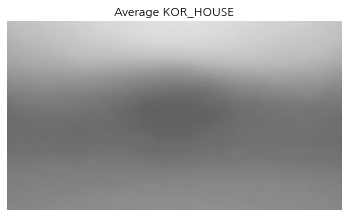

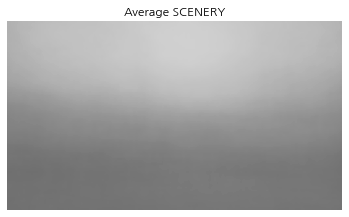

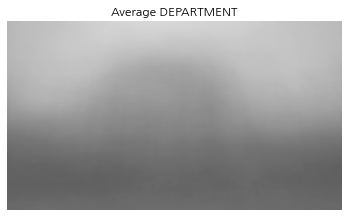

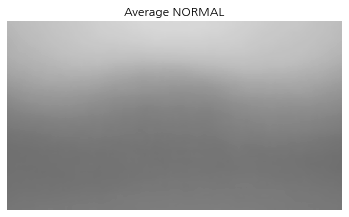

In [31]:
def find_mean_img(full_mat, title, size = (9*8, 16*8)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

k = find_mean_img(kor_house, 'KOR_HOUSE')
s = find_mean_img(scenery, 'SCENERY')
d = find_mean_img(department, 'DEPARTMENT')
n = find_mean_img(x, 'NORMAL')

(array([0.00129574, 0.00043191, 0.00237552, 0.00194361, 0.00280744,
        0.00539892, 0.00410318, 0.00734253, 0.01036592, 0.0079904 ,
        0.01274145, 0.01209358, 0.01403719, 0.01209358, 0.01166166,
        0.01511697, 0.01144571, 0.01058188, 0.01036592, 0.0095021 ,
        0.00755849, 0.0095021 , 0.00885423, 0.00626275, 0.01014997,
        0.00842231, 0.00626275, 0.0095021 , 0.01425315, 0.01079784,
        0.01360528, 0.01209358, 0.0095021 , 0.01014997, 0.01230953,
        0.01036592, 0.01036592, 0.00928614, 0.01187762, 0.01166166,
        0.01252549, 0.00928614, 0.01144571, 0.01360528, 0.00842231,
        0.01338932, 0.00971805, 0.01252549, 0.01209358, 0.01252549,
        0.01641271, 0.01144571, 0.01360528, 0.01144571, 0.01144571,
        0.01533293, 0.01468506, 0.0159808 , 0.01403719, 0.01252549,
        0.01317336, 0.01382123, 0.01014997, 0.01209358, 0.01274145,
        0.01274145, 0.01122975, 0.01101379, 0.01468506, 0.01252549,
        0.01403719, 0.01360528, 0.01338932, 0.01

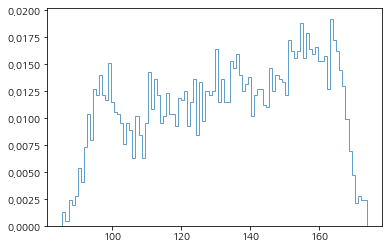

In [32]:
plt.hist(d[10:51].reshape(-1), bins = 100, density = True, alpha = 0.7, histtype='step')

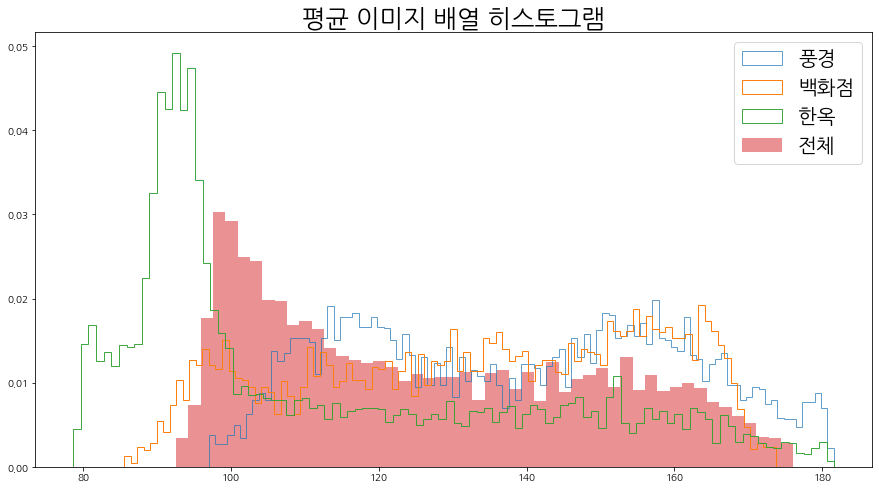

In [33]:
plt.figure(figsize = (15,8))
plt.hist(s[10:51].reshape(-1), bins = 100, density = True, alpha = 0.7, histtype = 'step')
plt.hist(d[10:51].reshape(-1), bins = 100, density = True, alpha = 1, histtype='step')
plt.hist(k[10:51].reshape(-1), bins = 100, density = True, alpha = 0.9, histtype='step')
plt.hist(n[10:51].reshape(-1), bins = 50, density = True, alpha = 0.5, histtype='stepfilled')
plt.legend(labels = ['풍경', '백화점', '한옥', '전체'], loc = 'best', fontsize = 20)
plt.title("평균 이미지 배열 히스토그램", fontsize= 25)
plt.show()

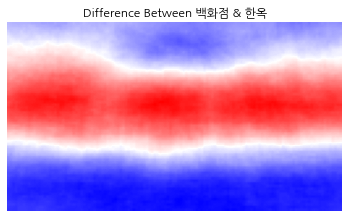

In [34]:
contrast_mean = d - k
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between 백화점 & 한옥')
plt.axis('off')
plt.show()

In [35]:
contrast_mean[60]

array([-24.93710088, -26.53943651, -27.10899558, -26.82719732,
       -26.70574412, -27.21136119, -27.88692493, -28.35155149,
       -28.14060789, -28.39232213, -28.74796454, -28.25081269,
       -28.47997016, -27.96196901, -27.40430649, -27.23461821,
       -27.42177513, -27.76869678, -27.87765452, -27.60314153,
       -26.96969042, -27.1127203 , -28.35886531, -28.07284622,
       -28.2392138 , -27.86691722, -27.99671642, -29.05060496,
       -28.28753739, -27.5825128 , -27.45148796, -26.94551327,
       -27.37051702, -28.38818482, -28.56634545, -29.02446695,
       -28.43774832, -28.78154985, -28.12255605, -28.14440899,
       -28.50302375, -28.56708568, -29.25173209, -29.16870463,
       -28.80034478, -27.96461229, -28.24154442, -28.57193967,
       -28.72504729, -27.95650113, -27.3148946 , -27.43148454,
       -27.6903527 , -27.4854102 , -26.5516964 , -26.37880592,
       -25.51771777, -26.08871662, -25.80605249, -25.76727841,
       -25.50830817, -26.22867422, -27.32678759, -26.05

In [36]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x, y)

SGDClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score

y_pred = sgd_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.601193436101442

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[569, 150,  98],
       [117, 362,  85],
       [148, 204, 278]], dtype=int64)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [43]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')    #soft로 하고 싶다면 svc의 하이퍼파라미터 probability=true로 바꿔줘야함
voting_clf.fit(x, y)
y_pred = voting_clf.predict(x_test)
accuracy_score(y_test, y_pred)

C:\Anaconda3\envs\envexample\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8135256091496768

In [44]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Anaconda3\envs\envexample\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.6250621581302834
RandomForestClassifier 0.8299353555445053
SVC 0.8264545002486325


C:\Anaconda3\envs\envexample\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8135256091496768


In [45]:
y_pred = voting_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[716,  65,  36],
       [108, 418,  38],
       [ 79,  49, 502]], dtype=int64)

In [46]:
confusion_matrix(y_test, y_pred)

array([[716,  65,  36],
       [108, 418,  38],
       [ 79,  49, 502]], dtype=int64)

In [47]:
len(y_test)

2011

### cross_validation

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf, x, y, scoring = 'accuracy',cv=10)

In [49]:
scores

array([0.81702128, 0.82765957, 0.8315565 , 0.86140725, 0.85074627,
       0.85714286, 0.80810235, 0.79530917, 0.80597015, 0.82729211])

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low=10, high=30),
    'max_features': randint(low=1, high=20),
}
forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026F33B99348>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026F33B09248>},
                   random_state=42, scoring='accuracy')

In [52]:
cvres = rnd_search.cv_results_
cvres

{'mean_fit_time': array([0.83293586, 0.95678577, 0.56789379, 1.11782556, 0.57654519,
        0.47831612, 0.39072099, 0.39957399, 0.35616703, 1.00099425]),
 'std_fit_time': array([0.01443729, 0.01843271, 0.01395221, 0.02079075, 0.01165896,
        0.01408196, 0.01504688, 0.01377854, 0.02047025, 0.01257303]),
 'mean_score_time': array([0.04287405, 0.03299394, 0.03771224, 0.03686571, 0.03189549,
        0.03125086, 0.04062314, 0.037291  , 0.04649887, 0.0494236 ]),
 'std_score_time': array([8.44713668e-03, 3.48930393e-03, 5.89984752e-03, 5.73476698e-03,
        7.88214024e-04, 1.23057250e-06, 7.65625187e-03, 8.05160666e-03,
        7.62646643e-04, 4.95982232e-03]),
 'param_max_features': masked_array(data=[7, 15, 8, 19, 11, 8, 2, 6, 1, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[29, 20, 16, 20, 13, 12, 21, 11, 21, 26],
       

In [53]:
rnd_search.best_estimator_

RandomForestClassifier(max_features=7, n_estimators=29, random_state=42)

In [54]:
final_model = rnd_search.best_estimator_

y_pred = final_model.predict(x_test)
accuracy_score(y_test, y_pred)



0.8105420188960716

### 헷갈려하는 이미지 출력

In [55]:
y_pred = final_model.predict(x_test)
conf_mx = confusion_matrix(y_test, y_pred)

In [56]:
conf_mx

array([[725,  49,  43],
       [118, 394,  52],
       [ 69,  50, 511]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred, average='macro')

0.8124597015856171

In [58]:
recall_score(y_test, y_pred, average='macro')

0.7990285240838642

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.8036673466883242

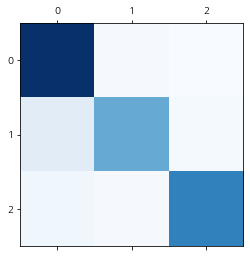

In [60]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(conf_mx, cmap = plt.cm.Blues)
plt.show()

### 오차행렬을 색으로 표현할 때 오차만 보기

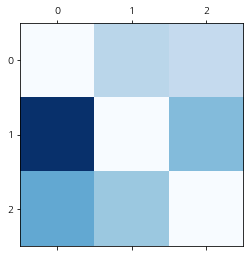

In [61]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.Blues)
plt.show()

### 헷갈리는 이미지

In [62]:
cl_a, cl_b = 2, 1
X_aa = x_test[(y_test==cl_a) & (y_pred == cl_a)]
X_ab = x_test[(y_test==cl_a) & (y_pred == cl_b)]
X_ba = x_test[(y_test==cl_b) & (y_pred == cl_a)]
X_bb = x_test[(y_test==cl_b) & (y_pred == cl_b)]

In [63]:
x[(y==cl_a) & (y == cl_a)]

array([[ 36.,  36.,  36., ...,  77.,  74.,  85.],
       [216., 215., 202., ..., 128., 128., 127.],
       [206., 205., 204., ...,  44.,  52.,  53.],
       ...,
       [ 48.,  50.,  54., ..., 144., 143., 144.],
       [195., 194., 193., ...,  62.,  65.,  64.],
       [225., 223., 230., ...,  95.,  95.,  95.]])

In [64]:
#숫자를 한번에 출력하는 함수 instances : 출력할 데이터, images_per_row : 한 행에 출력할 데이터 갯수
def plot_digits(instances, images_per_row=10, **options):
    #size = 28    #이미지 크기 설정
    
    #한 행에 출력하는 갯수보다 이미지의 갯수가 작을 시 이미지 갯수로 초기화
    images_per_row = min(len(instances), images_per_row) 
    
    #각 인스턴스, 각 이미지 데이터를 이미지 형태로 변환하여 리스트로 재 저장
    images = [instance.reshape(9*8,16*8) for instance in instances]
    #전체 이미지를 images_per_row에 따라 몇개의 row로 그릴지 파악
    print(instances.shape)
    n_rows = (len(instances)-1) //images_per_row + 1
    print(n_rows)
    
    #배열을 images_per_row 갯수씩 n_rows의 수 만큼 담을 배열
    row_images= []
    
    #행x열 이미지를 담을 그릇에서 실제로 이미지가 담기지 않는 부분 파악
    n_empty = n_rows * images_per_row - len(instances)
    
    #그릇의 크기에서 마지막 남는 부분의 픽셀 크기만큼 0으로 채움
    images.append(np.zeros((9*8, 16*8 * n_empty)))
    
    #images에서 10개씩 ndarray를 추출하여 리스트에 하나씩 담는다 
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    print(type(row_images))
    
    #리스트의 배열요소들을 하나씩 위아래를 기준으로 아래로 하나씩 붙여 ndarray로 만든다
    image = np.concatenate(row_images, axis=0)
    print(type(image))
    
    #이미지 출력
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    
    #축을 없앤다 
    plt.axis('off')

(25, 9216)
5
<class 'list'>
<class 'numpy.ndarray'>
(25, 9216)
5
<class 'list'>
<class 'numpy.ndarray'>
(25, 9216)
5
<class 'list'>
<class 'numpy.ndarray'>
(25, 9216)
5
<class 'list'>
<class 'numpy.ndarray'>


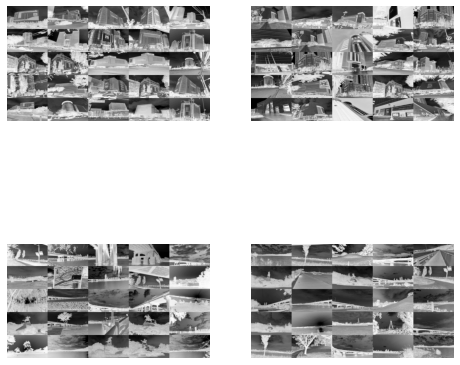

In [67]:
import matplotlib as mpl
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()


In [68]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [69]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [70]:
def plot_digit(data):
    image = data.reshape(16*8, 9*8)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure landmark_feature_importance_plot


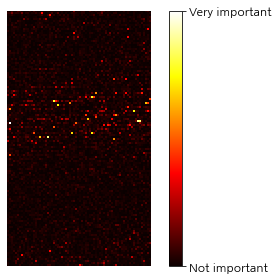

<Figure size 1800x1440 with 0 Axes>

In [71]:
plot_digit(final_model.feature_importances_)

cbar = plt.colorbar(ticks=[final_model.feature_importances_.min(), final_model.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("landmark_feature_importance_plot")
plt.figure(figsize=(25,20))
plt.show()

### gradient descent

In [83]:
#계단함수
def step_function(x):
    return np.array(x > 0, dtype=np.int)
#시그모이드 함수
def sigmoid(x):
    print('시그모이드')
    return 1 / (1 + np.exp(-x))
#렐류함수
def relu(x):
    return np.maximum(0,x)
#시그모이드 함수 미분
def sigmoid_grad(x):
    print(type(sigmoid(x)))
    print((1.0 - sigmoid(x)).shape)
    print(((1.0 - sigmoid(x)) * sigmoid(x)).shape)
    return (1.0 - sigmoid(x)) * sigmoid(x)
#렐류 함수 미분
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>0] = 1
    return grad
#출력 함수 소프트맥스
def softmax(x):
    if x.ndim ==2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) - np.sum(np.exp(x))
#mse 평균절대오차 함수
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
#크로스엔트로피 함수
def cross_entropy_error(y,t):
    if y.ndim ==  1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
#소프트맥스 y 값 손실 함수
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)
#경사 하강법
def numerical_gradient(f, x):
    h = 1e-4
    #가중치 x의 크기만큼 메모리 할당
    grad = np.zeros_like(x)
    #2차원 배열 x의 요소 하나씩 접근
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    #모든 x 요소에 대하여 미분
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        #다음 요소로
        it.iternext()
        
    return grad

In [114]:
class TwoLayerNet:
    #초기화 함수
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        #입력층 x 히든레이어 층 수만큼 가중치 생성
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        #은닉노드 수만큼 bias 생성
        self.params['b1'] = np.zeros(hidden_size)
        #은닉노드수 x 출력층 가중치 생성
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        #출력층 만큼 bias 0으로 생성
        self.params['b2'] = np.zeros(output_size)
        self.count = 0
    
    #가중치 연산을 통해 y값 예측
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        #입력층과 연산층 가중치, 입력값 행렬곱
        a1 = np.dot(x, W1) + b1
        #시그모이드 함수 적용해서 은닉층에 전달
        z1 = sigmoid(a1)
        #은닉층과 출력층 출력값, 가중치 행렬곱
        a2 = np.dot(z1, W2) + b2
        #소프트맥스 함수 적용 후 출력층 전달
        y = softmax(a2)
        #값 리턴
        return y
    
    #손실함수 계산
    def loss(self, x, t):
        y = self.predict(x)
        #크로스 엔트로피 손실함수 리턴
        return cross_entropy_error(y, t)
    #분류 정확도 측정
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        #y와 t가 일치하는 행의 수 / 입력값의 행의 길이 계산 후 리턴
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    #경사 하강법
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        #손실함수 값 loss_W을 이용하여 경사하강법 적용하여 손실함수 최소가 되는 값 탐색
        grads ={}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        #입력받은 가중치, 입력값, 편향을 사용하여 출력 값 계산
        #forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        #두번째 층 가중치 및 편향 계산
        #backward
        print(batch_num)
        print("y:", y)
        print("t:", t)
        print(y - t)
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        print("백워드 기울기 계산")        
        dz1 = np.dot(dy, W2.T)
        print("size of dz1: ", dz1.shape)
        da1 = sigmoid_grad(a1) * np.asarray(dz1,dtype = 'float32')
        
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1,axis=0)
        
        return grads

In [115]:
np.array([[1,1,2],[2,2,3]]) * np.array([[2,4,5],[1,2,3]])

array([[ 2,  4, 10],
       [ 2,  4,  9]])

In [116]:
network = TwoLayerNet(input_size = 16*8*9*8, hidden_size=1000, output_size = 3)

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(y)
labels = encoder.transform(y)
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)
# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
원-핫 인코딩 데이터 차원
(4692, 3)


In [118]:
x.shape

(4692, 9216)

In [119]:
grad_backprop = network.gradient(x, oh_labels)

시그모이드
4692
y: [[0.34506314 0.31287037 0.34206649]
 [0.31015983 0.34193346 0.34790671]
 [0.30706129 0.30906232 0.38387639]
 ...
 [0.28512562 0.34078657 0.37408781]
 [0.29812259 0.29266273 0.40921468]
 [0.36360001 0.28936983 0.34703017]]
t:   (0, 2)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 2)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 2)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 2)	1.0
  (24, 0)	1.0
  :	:
  (4667, 1)	1.0
  (4668, 2)	1.0
  (4669, 2)	1.0
  (4670, 0)	1.0
  (4671, 2)	1.0
  (4672, 0)	1.0
  (4673, 0)	1.0
  (4674, 1)	1.0
  (4675, 2)	1.0
  (4676, 0)	1.0
  (4677, 0)	1.0
  (4678, 1)	1.0
  (4679, 0)	1.0
  (4680, 0)	1.0
  (4681, 0)	1.0
  (4682, 2)	1.0
  (4683, 2)	1.0
  (4684, 1)	1.0
  (4685, 0)	1.0
  (4686, 0)	1.0
  (4687, 1)	1.0
  (4688, 1)	1.0
  (4689, 0)	1.0
  (4690, 0)	1.0
  (4691, 1)	1.0
[[ 0.34506314  

In [120]:
grad_backprop

{'W2': matrix([[-8.70725033e-02,  3.45011230e-02,  5.25713803e-02],
         [-6.67774845e-02,  2.94309824e-02,  3.73465021e-02],
         [-7.47697375e-04,  7.76249694e-04, -2.85523192e-05],
         ...,
         [-6.55211138e-02,  2.37288457e-02,  4.17922681e-02],
         [-8.12622956e-02,  3.08157739e-02,  5.04465217e-02],
         [-7.54809019e-02,  2.94814626e-02,  4.59994392e-02]]),
 'b2': matrix([[-0.08707154,  0.03450218,  0.05256937]]),
 'W1': array([[ 2.22450083e-07,  8.26694244e-04, -3.78648537e-05, ...,
          2.19341990e-03,  1.71884553e-03, -4.61653802e-04],
        [ 1.77960081e-07,  8.39215714e-04, -4.34817008e-05, ...,
          2.12386603e-03,  1.69498904e-03, -4.86828462e-04],
        [ 1.77960090e-07,  8.56021414e-04, -4.00325384e-05, ...,
          2.16671715e-03,  1.74359698e-03, -4.67043490e-04],
        ...,
        [ 2.09103052e-06,  7.78011900e-04, -3.23117106e-05, ...,
          1.63727208e-03,  8.38496523e-04, -3.65463892e-04],
        [ 6.67350196e-07,

In [121]:
iters_num = 10000  #만 개
print(iters_num)
train_size = x.shape[0]
print(train_size)
batch_size = 100 #미니 배치 크기 100
learning_rate = 0.1 #학습률 설정
iter_per_epoch = max(train_size / batch_size, 1) #몇뭉탱이인지
print(iter_per_epoch) #6만개인데 배치크기가 100이라 600뭉치.

10000
4692
46.92


In [123]:
for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) # 원소 갯수를 배치크기만큼 뽑기? 인덱스번호.[123,146,7,88568,]
    x_batch = x[batch_mask] #트레인에서 인덱스를 찾아서 배치 생성.(배치사이즈만큼이지.)
    t_batch = oh_labels[batch_mask]
    
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판   #네트워크 기울기를 구함?
    
    #배개 변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # Loss출력
    if i % iter_per_epoch == 0: #배치마다 로스 출력
        print("loss: " + str(loss))

시그모이드
100
y: [[0.33497877 0.31146718 0.35355405]
 [0.29872125 0.32313291 0.37814584]
 [0.29179078 0.35262824 0.35558098]
 [0.28280413 0.32923637 0.3879595 ]
 [0.30603509 0.33007259 0.36389232]
 [0.30921572 0.34109929 0.34968499]
 [0.30470163 0.324681   0.37061737]
 [0.33127044 0.35806695 0.3106626 ]
 [0.34752893 0.34334651 0.30912456]
 [0.31259692 0.32347345 0.36392963]
 [0.33115924 0.32429385 0.34454691]
 [0.29369064 0.3273393  0.37897005]
 [0.34014029 0.26855944 0.39130027]
 [0.37374249 0.28827665 0.33798085]
 [0.30397787 0.31097101 0.38505112]
 [0.34380694 0.29773904 0.35845402]
 [0.31345586 0.32655353 0.3599906 ]
 [0.307284   0.31149815 0.38121785]
 [0.34078193 0.32548982 0.33372825]
 [0.33376061 0.31432298 0.35191641]
 [0.33557442 0.32977271 0.33465286]
 [0.28067985 0.34212925 0.3771909 ]
 [0.31442436 0.32199103 0.36358461]
 [0.31209947 0.35837952 0.32952101]
 [0.35500767 0.29524924 0.34974308]
 [0.29910628 0.32383162 0.3770621 ]
 [0.3059405  0.34902209 0.34503742]
 [0.29558689 0.

ValueError: non-broadcastable output operand with shape (3,) doesn't match the broadcast shape (1,3)

In [ ]:
train_acc = network.accuracy(x, oh_labels.toarray())

In [ ]:
train_acc

In [ ]:
x

In [ ]:
print(oh_labels.toarray())